In [1]:
import matplotlib.pyplot as plt
import json
from shapely.geometry import Polygon, shape, box, mapping
import geopandas as gpd
from shapely import wkt
from shapely.geometry import box

In [2]:
url = "https://datacube.services.geo.ca/api/search?collections=salish"
gdf = gpd.read_file(url)
geom = gdf.geometry

In [3]:
matrix = []
for i in range(len(gdf)):
    cur_geom = {'id':[gdf.id[i]], 'geometry':shape(geom[i])}
    cur_gdf = gpd.GeoDataFrame(cur_geom, crs = "EPSG:4326")
    matrix.append(cur_gdf)
print(matrix)

[            id                                           geometry
0  salish-1950  POLYGON ((-123.29531 49.14178, -122.78618 49.1...,             id                                           geometry
0  salish-1959  POLYGON ((-123.55737 49.09842, -122.38712 49.0...,             id                                           geometry
0  salish-1967  POLYGON ((-123.44615 49.00821, -122.42590 49.0...,             id                                           geometry
0  salish-1972  POLYGON ((-123.31921 49.22520, -122.80963 49.2...,             id                                           geometry
0  salish-1978  POLYGON ((-123.44380 49.15707, -122.28672 49.1...,             id                                           geometry
0  salish-1982  POLYGON ((-123.31661 49.02470, -122.39550 49.0...]


<function matplotlib.pyplot.show(close=None, block=None)>

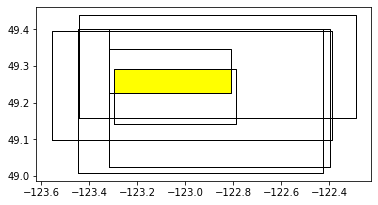

In [4]:
result=[]
result.append(gpd.overlay(matrix[0],matrix[1],how='intersection'))
for i in range (0,len(matrix)-2,1):
    cur = gpd.overlay(result[i],matrix[i+2], how='intersection')
    result.append(cur)
#take the last result
final = result[-1]
#print(x)

ax = final.plot(color='yellow')
for i in range(0,len(matrix),1):
    matrix[i].plot(ax=ax, facecolor='None', edgecolor='k');
plt.show

In [5]:
# parameters
para = 'datacube'
bound_box = box(*final.total_bounds)
start = gdf.datetime[0]
end = gdf.datetime[len(gdf)-1]
crs = gdf.crs

In [6]:
final.total_bounds
minx = final.total_bounds[0]
miny = final.total_bounds[1]
maxx = final.total_bounds[2]
maxy = final.total_bounds[3]
new_bbox = [miny,minx,maxy,maxx]

In [7]:
def getUrl(collection='salish',parameter='datacube',value='notset',start_date=start,end_date=end,width='732',height='982'):
    layers='salish'
    crs="EPSG:4326"
    x = ""+ str(miny) + ',' + str(minx) + ',' + str(maxy) + ',' + str(maxx) 
    url = "https://datacube.services.geo.ca/ows/aerial?service=wms&request=GetMap&styles=&format=image/png"
    url+="&LAYERS=%s&WIDTH=%s&HEIGHT=%s&CRS=%s&"%(layers,width,height,crs)
    
    url+="BBOX=%s"%(x)
    url+="&TIME=%sT12:00:00Z/%sT12:00:00Z"%(start_date,end_date)
    url+="&%s=%s"%(parameter,value)
    return url
url=getUrl(collection='salish',parameter='datacube',
                       value='notset',start_date=start,
                       end_date=end,width='732',height='982')
print(url)

https://datacube.services.geo.ca/ows/aerial?service=wms&request=GetMap&styles=&format=image/png&LAYERS=salish&WIDTH=732&HEIGHT=982&CRS=EPSG:4326&BBOX=49.225195681615254,-123.29530682511599,49.29047868957142,-122.8096294492051&TIME=1950-01-01T00:00:00+00:00T12:00:00Z/1982-01-01T00:00:00+00:00T12:00:00Z&datacube=notset


In [8]:
#https://datacube.services.geo.ca/ows/aerial?service=wms&request=GetMap&styles=&format=image/png&LAYERS=salish&WIDTH=732&HEIGHT=982&CRS=EPSG:4326&BBOX=49.225195681615254,-123.29530682511599,49.29047868957142,-122.8096294492051&TIME=1950-01-01T00:00:00+00:00T12:00:00Z/1982-01-01T00:00:00+00:00T12:00:00Z&datacube=notset